# **Basic Set up**

In [10]:
import sys
!{sys.executable} -m pip install --user scikit-plot
!{sys.executable} -m pip install --user keras
!{sys.executable} -m pip install --user numpy
!{sys.executable} -m pip install --user tensorflow

  Using cached https://files.pythonhosted.org/packages/7a/ce/e76c4e3d2c245f4f20eff1bf9cbcc602109448142881e1f946ba2d7327bb/tensorflow-2.4.0-cp36-cp36m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/bc/58/0aa6fb779dc69cfc811df3398fcbeaeefbf18561b6e36b185df0782781cc/absl_py-0.11.0-py3-none-any.whl
     |████████████████████████████████| 51kB 7.9MB/s  eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/d6/84/759f5dd23fec8ba71952d97bcc7e2c9d7d63bdc582421f3cd4be845f0c98/gast-0.3.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/74/7e/622d9849abf3afb81e482ffc170758742e392ee129ce1540611199a59237/tensorflow_estimator-2.4.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/fe/fd/247ef25f5ec5f9acecfbc98ca3c6aaf66716cf52509aca9a93583d410493/protobuf-3.14.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/8a/48/a76be51647d0eb9f10e2a4511bf3ffb8cc1e6b14e9e4fab46

In [11]:
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import scikitplot as skplt
import keras
import numpy as np

In [12]:
#load the models first

yaml_file = open('seq2seq_model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
seq2seq = keras.models.model_from_yaml(loaded_model_yaml)
# load weights into new model
seq2seq.load_weights("seq2seq_model.h5")
print("Loaded model from disk")


with open("seq2seq_trainHistoryDict.pkl",'rb') as f:
  seq2seq_history = pickle.load(f)
print(seq2seq_history)

Loaded model from disk
{'val_loss': [2.0318806171417236, 1.8410731554031372, 1.7233582735061646, 1.673858404159546, 1.6193004846572876, 1.5370306968688965, 1.4649014472961426, 1.4075077772140503, 1.357668399810791, 1.3149667978286743, 1.2775806188583374, 1.2477819919586182, 1.2212615013122559, 1.197798252105713, 1.1757978200912476, 1.1569609642028809, 1.1404132843017578, 1.1247878074645996, 1.1103283166885376, 1.0980861186981201, 1.0856196880340576, 1.0744280815124512, 1.063878059387207, 1.0529371500015259, 1.0422595739364624], 'accuracy': [0.6440949440002441, 0.651537299156189, 0.651537299156189, 0.651537299156189, 0.653731107711792, 0.667414665222168, 0.6797032952308655, 0.6922744512557983, 0.7027521133422852, 0.716376543045044, 0.7255974411964417, 0.7309538722038269, 0.7353869080543518, 0.7394604682922363, 0.7438715100288391, 0.7478576898574829, 0.7516905665397644, 0.7551804184913635, 0.7579324841499329, 0.760589063167572, 0.7625746130943298, 0.7646501660346985, 0.7663586735725403, 

In [13]:
#load the models first

bin_yaml_file = open('binary_model.yaml', 'r')
bin_loaded_model_yaml = bin_yaml_file.read()
bin_yaml_file.close()
binary = keras.models.model_from_yaml(bin_loaded_model_yaml)
# load weights into new model
binary.load_weights("binary_model.h5")
print("Loaded model from disk")

with open("binary_trainHistoryDict.pkl",'rb') as f:
  binary_history = pickle.load(f)
print(binary_history)

Loaded model from disk
{'val_loss': [0.6931204795837402, 0.6930217146873474, 0.6931228041648865, 0.693128764629364, 0.6930571794509888, 0.6931017637252808, 0.6930093765258789, 0.6930814981460571, 0.6930732131004333, 0.6930383443832397, 0.6930223107337952, 0.6930788159370422, 0.693096935749054, 0.6930851340293884, 0.6930879950523376, 0.6931229829788208, 0.6931016445159912, 0.6931066513061523, 0.6930679678916931, 0.6930232644081116, 0.6930879354476929, 0.6931979060173035, 0.6930961608886719, 0.6931003332138062, 0.6931262612342834], 'accuracy': [0.5008859038352966, 0.5054395794868469, 0.5037386417388916, 0.5068393349647522, 0.5060420036315918, 0.5041815638542175, 0.5072823166847229, 0.505368709564209, 0.5050320625305176, 0.5043764710426331, 0.5059534311294556, 0.5048903226852417, 0.5064849853515625, 0.5068747997283936, 0.5050143599510193, 0.5047485828399658, 0.50490802526474, 0.505297839641571, 0.5057053565979004, 0.505297839641571, 0.5055990815162659, 0.5047485828399658, 0.50614833831787

In [14]:
with open("y_pred.pkl",'rb') as pred:
  y_pred = pickle.load(pred)

with open("y_true.pkl",'rb') as true:
  y_true = pickle.load(true)

print(len(y_true))
print(len(y_pred))

1000
1000


In [15]:
EPOCHS = 25

# **Seq2Seq Plots**

1. Loss Plot
2. Acc Plot
3. Test Acc,Loss (already in the terminal output)

Text(0.5,1,'Loss for Seq2Seq')

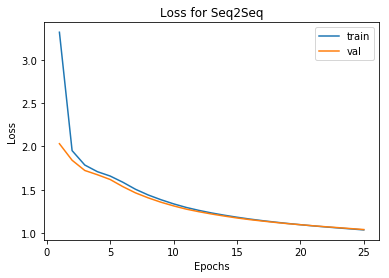

In [16]:
plt.plot(list(range(1,EPOCHS+1)),seq2seq_history['loss'],label='train')
plt.plot(list(range(1,EPOCHS+1)),seq2seq_history['val_loss'],label = 'val')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss for Seq2Seq")

Text(0.5,1,'Accuracy for Seq2Seq')

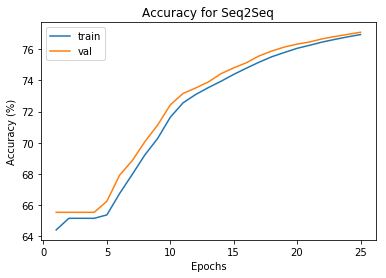

In [17]:
plt.plot(range(1,EPOCHS+1),np.array(seq2seq_history['accuracy'])*100.00,label='train')
plt.plot(range(1,EPOCHS+1),np.array(seq2seq_history['val_accuracy']) * 100.0,label = 'val')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Accuracy for Seq2Seq")

# **Binary Model Plots**

1. Loss Plot
2. Acc Plot
3. ROC Plot
4. PR plot
5. F1 score report

In [18]:
from collections import Counter
print(dict(Counter(y_true)))

{0: 485, 1: 515}


In [19]:
y_pred

array([[0.5073688 ],
       [0.50735325],
       [0.50735325],
       [0.50735325],
       [0.50735325],
       [0.50754267],
       [0.50735325],
       [0.50735325],
       [0.50735325],
       [0.50735325],
       [0.50735325],
       [0.50735325],
       [0.50735325],
       [0.50735325],
       [0.50735325],
       [0.5059428 ],
       [0.50735325],
       [0.50735325],
       [0.50735325],
       [0.50735325],
       [0.50735325],
       [0.5074641 ],
       [0.50735325],
       [0.50735325],
       [0.50735325],
       [0.50735325],
       [0.50735325],
       [0.50735325],
       [0.50735325],
       [0.50735325],
       [0.50735325],
       [0.50735325],
       [0.50802106],
       [0.50735325],
       [0.50735325],
       [0.50735325],
       [0.50735325],
       [0.50735325],
       [0.50735325],
       [0.50735325],
       [0.50735325],
       [0.50735325],
       [0.50735325],
       [0.50735325],
       [0.50735325],
       [0.50710565],
       [0.50735325],
       [0.507

Text(0.5,1,'Loss for Binary Classifier')

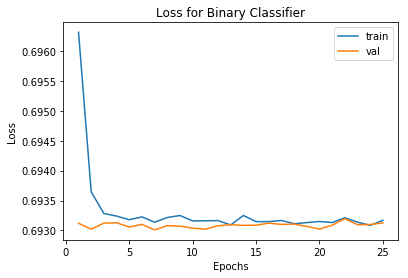

In [20]:
plt.plot(list(range(1,EPOCHS+1)), binary_history['loss'],label='train')
plt.plot(list(range(1,EPOCHS+1)),binary_history['val_loss'],label = 'val')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss for Binary Classifier")

Text(0.5,1,'Accuracy for Binary Classifier')

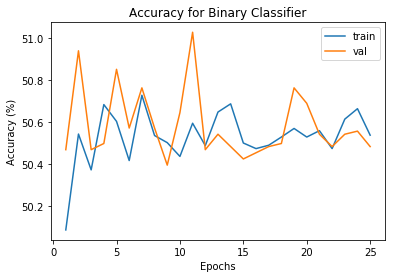

In [21]:
plt.plot(list(range(1,EPOCHS+1)), np.array(binary_history['accuracy'])*100.00,label='train')
plt.plot(list(range(1,EPOCHS+1)),np.array(binary_history['val_accuracy'])*100.00,label = 'val')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Accuracy for Binary Classifier")

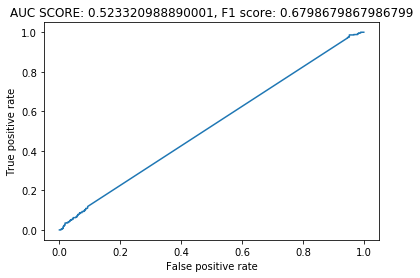

In [22]:
fpr, tpr, _ = roc_curve(y_true, y_pred)
auc_roc = roc_auc_score(y_true,y_pred) 
y_pred_f1 = y_pred > 0.5 #Basic threshold
f1 = f1_score(y_true,y_pred_f1)
plt.plot(fpr, tpr)
plt.title(f"AUC SCORE: {auc_roc}, F1 score: {f1}")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

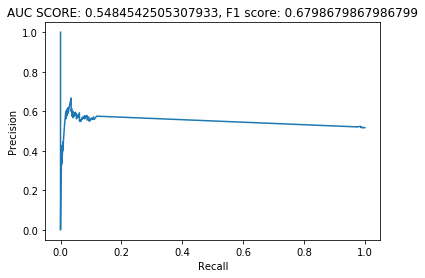

In [23]:
precision, recall, _ = precision_recall_curve(y_true, y_pred)
auc_roc = auc(recall,precision) 
y_pred_f1 = y_pred > 0.5 #Basic threshold
f1 = f1_score(y_true,y_pred_f1)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"AUC SCORE: {auc_roc}, F1 score: {f1}")
plt.show()

<Figure size 432x288 with 0 Axes>

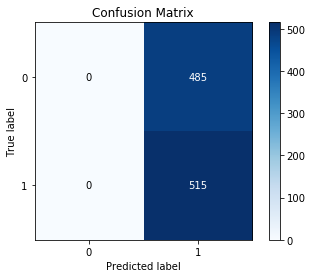

In [24]:
y_pred_f1 = y_pred > 0.5 #Basic threshold
plt.figure()
skplt.metrics.plot_confusion_matrix(y_true,y_pred_f1)
plt.show()